In [ ]:
!sudo apt-get update -qq
!sudo apt-get install -y r-base
!sudo apt-get install -y r-base-dev
!sudo apt-get install -y libssl-dev
!sudo apt-get install -y libcurl4-openssl-dev
!sudo apt-get install -y libxml2-dev


ERROR: Error in parse(text = input): <text>:1:7: unexpected symbol
1: !sudo apt
          ^


In [ ]:

install.packages("bnlearn")
install.packages("bnclassify")
install.packages("e1071")
install.packages("randomForest")
library(bnlearn)
library(bnclassify)
library(e1071)
library(randomForest)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

# Read the data
course.grades <- read.table("2020_bn_nb_data.txt", header = TRUE)



  Bayesian network parameters

  Parameters of node EC100 (multinomial distribution)

Conditional probability table:
 
     MA101
EC100         AA         AB         BB         BC         CC         CD
   AA 0.75000000 0.07692308 0.03846154 0.01851852 0.00000000 0.00000000
   AB 0.00000000 0.46153846 0.25000000 0.05555556 0.00000000 0.00000000
   BB 0.25000000 0.23076923 0.32692308 0.22222222 0.04081633 0.00000000
   BC 0.00000000 0.15384615 0.28846154 0.27777778 0.32653061 0.00000000
   CC 0.00000000 0.07692308 0.09615385 0.24074074 0.32653061 0.04166667
   CD 0.00000000 0.00000000 0.00000000 0.12962963 0.26530612 0.33333333
   DD 0.00000000 0.00000000 0.00000000 0.03703704 0.04081633 0.50000000
   F  0.00000000 0.00000000 0.00000000 0.01851852 0.00000000 0.12500000
     MA101
EC100         DD          F
   AA 0.00000000 0.00000000
   AB 0.00000000 0.00000000
   BB 0.00000000 0.00000000
   BC 0.00000000 0.00000000
   CC 0.00000000 0.00000000
   CD 0.04761905 0.00000000
   DD 0.190476

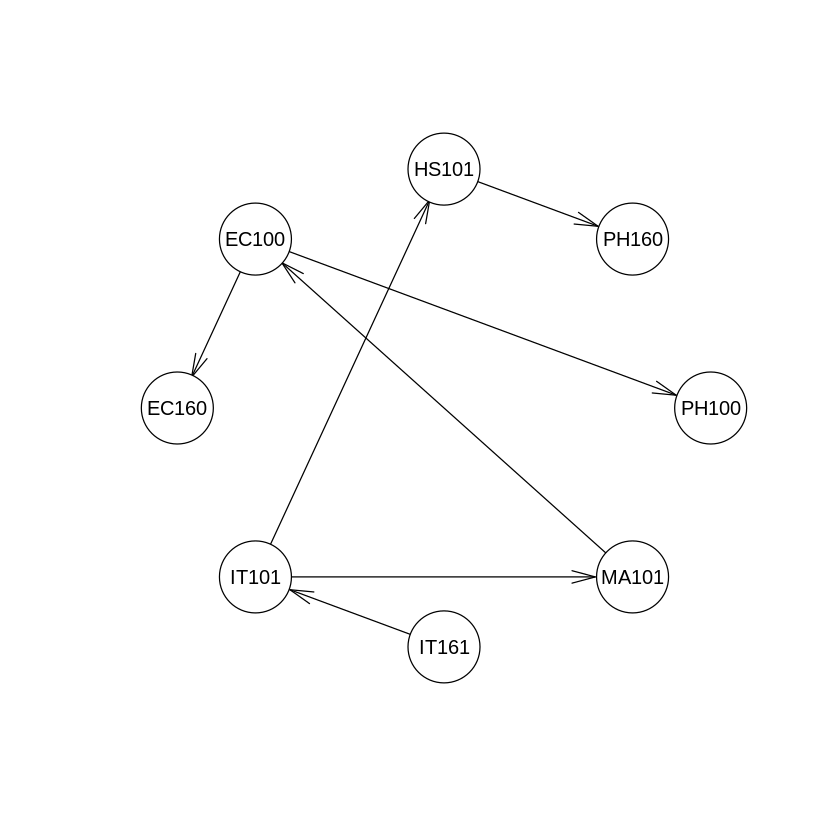

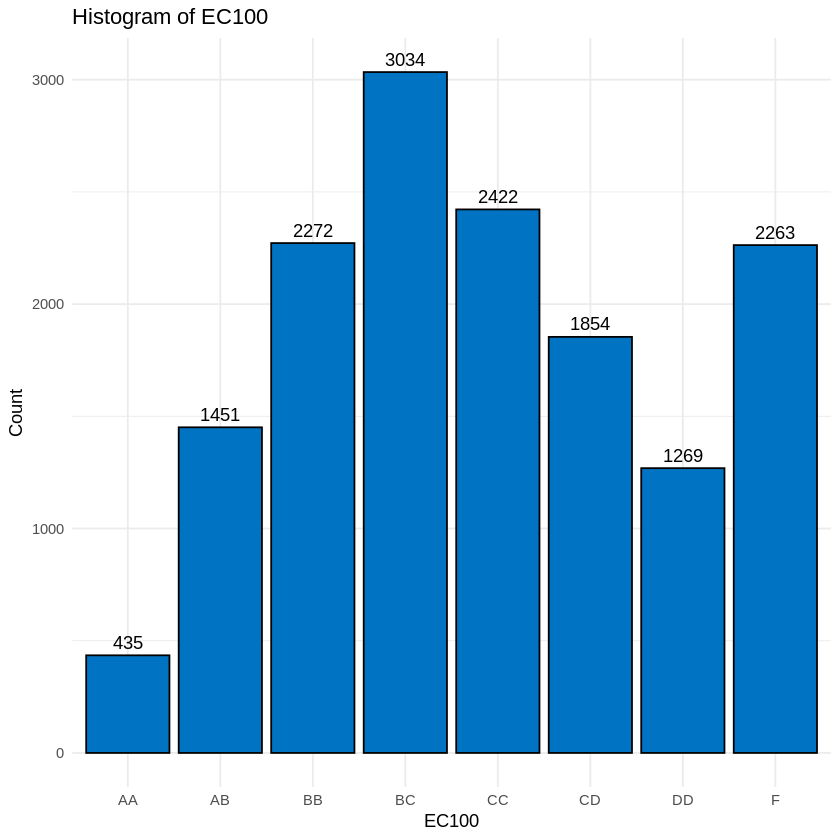

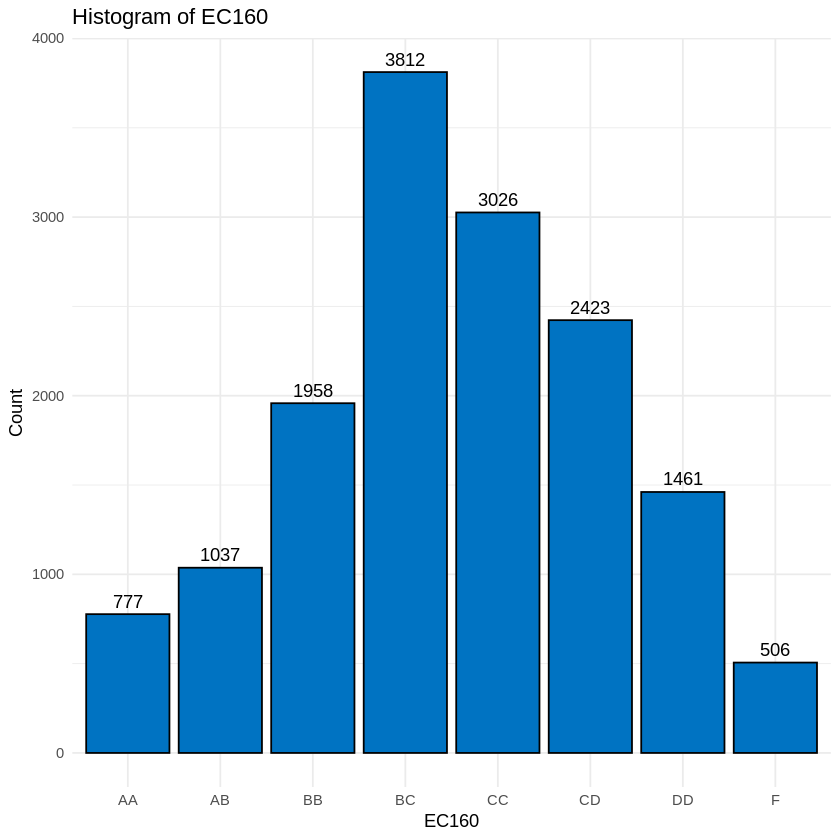

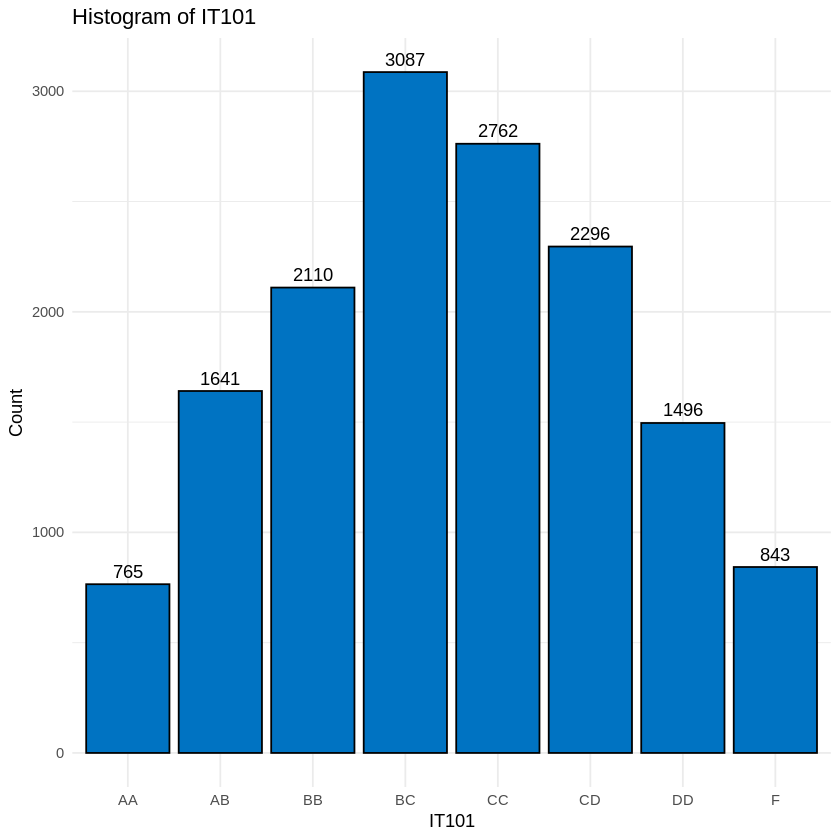

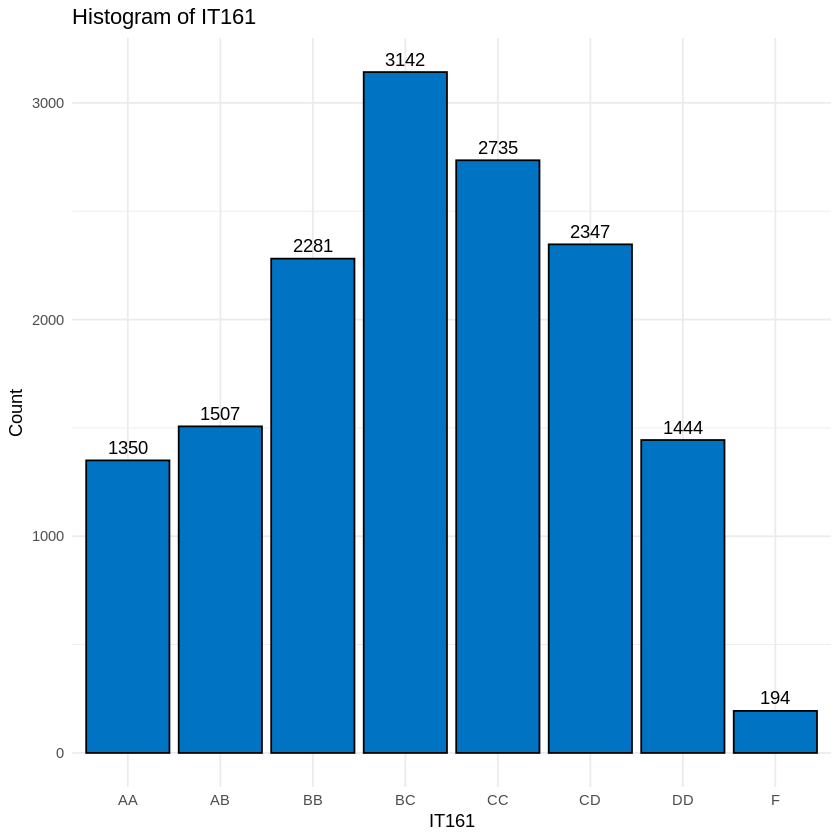

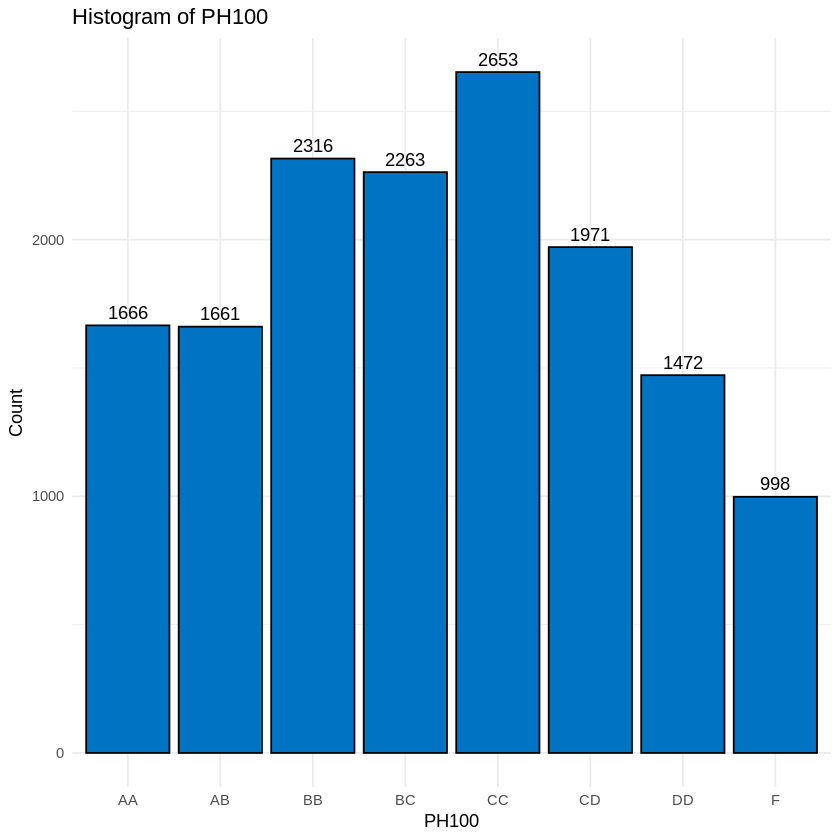

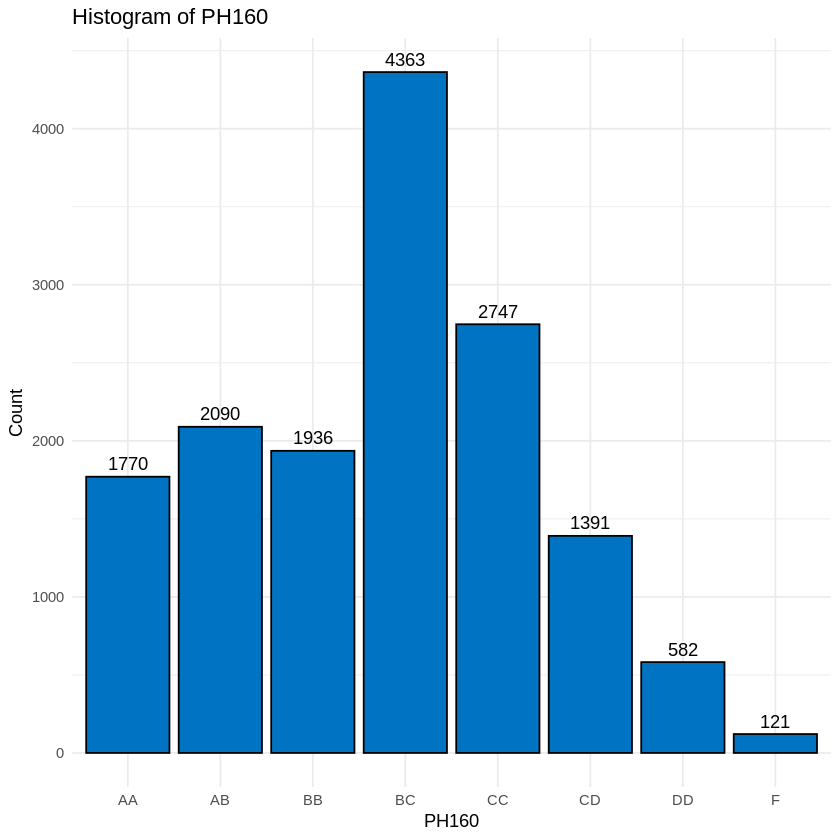

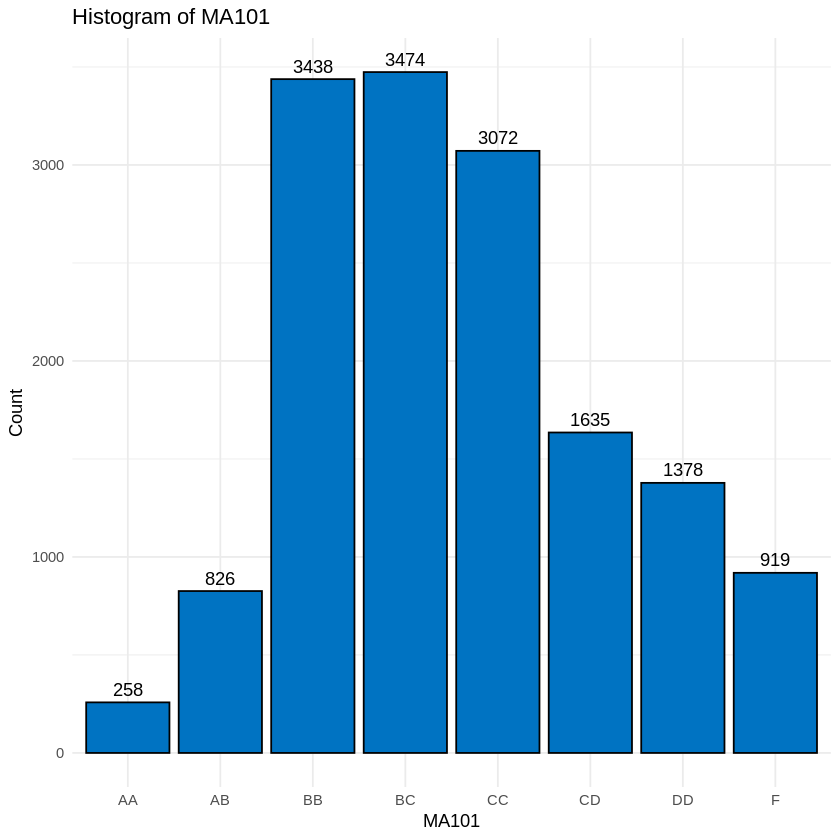

[1] CD
Levels: AA AB BB BC CC CD DD F
Accuracy for repetition 1 : 0.9714286 
Accuracy for repetition 2 : 0.9714286 
Accuracy for repetition 3 : 0.9714286 
Accuracy for repetition 4 : 0.9714286 
Accuracy for repetition 5 : 0.9857143 
Accuracy for repetition 6 : 0.9857143 
Accuracy for repetition 7 : 1 
Accuracy for repetition 8 : 1 
Accuracy for repetition 9 : 0.9714286 
Accuracy for repetition 10 : 0.9428571 
Accuracy for repetition 11 : 0.9571429 
Accuracy for repetition 12 : 1 
Accuracy for repetition 13 : 0.9857143 
Accuracy for repetition 14 : 0.9571429 
Accuracy for repetition 15 : 0.9714286 
Accuracy for repetition 16 : 0.9714286 
Accuracy for repetition 17 : 0.9571429 
Accuracy for repetition 18 : 0.9857143 
Accuracy for repetition 19 : 0.9857143 
Accuracy for repetition 20 : 0.9571429 
Average Accuracy: 0.975 
Accuracy for repetition 1 : 0.9142857 
Accuracy for repetition 2 : 0.9428571 
Accuracy for repetition 3 : 0.9571429 
Accuracy for repetition 4 : 0.9857143 
Accuracy for r

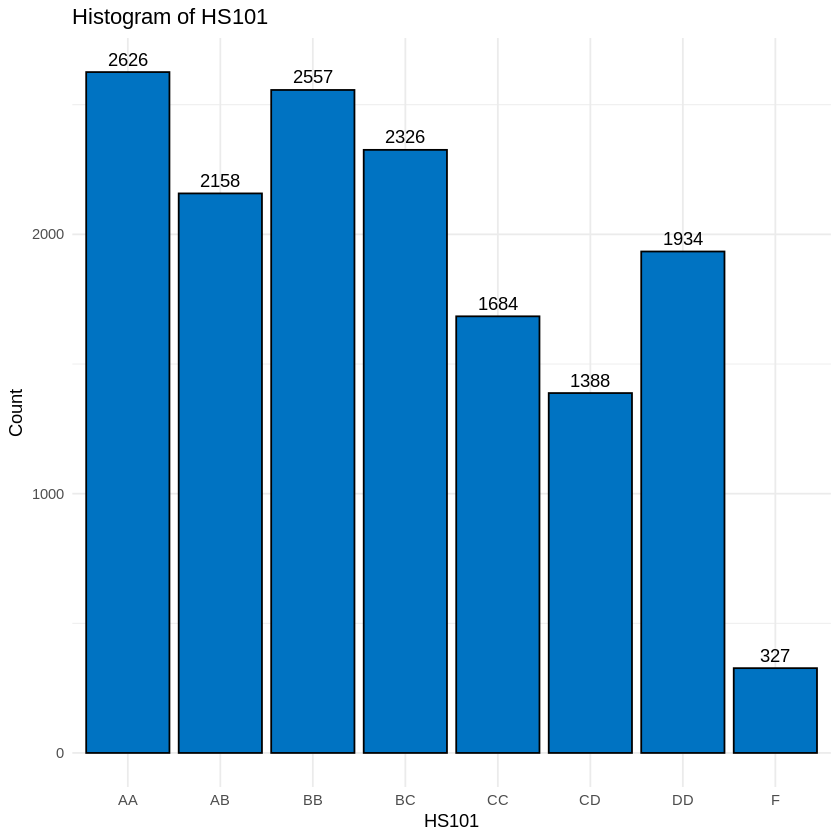

In [ ]:
# Convert character variables to factors
variables_to_convert <- c("EC100", "EC160", "IT101", "IT161", "MA101", "PH100", "PH160", "HS101", "QP")
course.grades[variables_to_convert] <- lapply(course.grades[variables_to_convert], as.factor)

# Bayesian Network Structure Learning
course.grades.net <- hc(course.grades[,-9], score = "k2")
plot(course.grades.net)

# Fit the network to the data
course.grades.net.fit <- bn.fit(course.grades.net, course.grades[,-9])

# Print the fitted network parameters
print(course.grades.net.fit)

# Generate histograms for each variable
variables <- c("EC100", "EC160", "IT101", "IT161", "PH100", "PH160", "MA101", "HS101")

for (var in variables) {
  df <- data.frame(cpdist(course.grades.net.fit, nodes = var, evidence = TRUE))
  ggplot(df, aes(x = .data[[var]])) +  # Use tidy evaluation for aes
    geom_bar(fill = "#0073C2FF", color = "black", stat="count") +  # Use geom_bar with stat="count" for discrete data
    labs(title = paste("Histogram of", var), x = var, y = "Count") +
    theme_minimal() +
    geom_text(stat='count', aes(label=after_stat(count)), vjust=-0.5) -> p  # Update count label
  print(p)
}

# Bayesian Network Prediction
grades <- data.frame(EC100 = factor("DD", levels = levels(course.grades$EC100)),
                     IT101 = factor("CC", levels = levels(course.grades$IT101)),
                     MA101 = factor("CD", levels = levels(course.grades$MA101)))

predicted_grade_PH100 <- predict(course.grades.net.fit, node = "PH100", method = "bayes-lw", data = grades)
print(predicted_grade_PH100)

# Naive Bayes Classification
num_repetitions <- 20
accuracy_values <- numeric(num_repetitions)

for (i in 1:num_repetitions) {
  set.seed(i)
  course.grades <- course.grades[sample(nrow(course.grades)), ]
  training_rows <- round(0.7 * nrow(course.grades))
  training_data <- course.grades[1:training_rows, ]
  testing_data <- course.grades[(training_rows + 1):nrow(course.grades), ]

  model <- naiveBayes(QP ~ ., data = training_data)
  predictions <- predict(model, testing_data)
  accuracy <- sum(predictions == testing_data$QP) / nrow(testing_data)
  accuracy_values[i] <- accuracy
  cat("Accuracy for repetition", i, ":", accuracy, "\n")
}

average_accuracy <- mean(accuracy_values)
cat("Average Accuracy:", average_accuracy, "\n")

# Random Forest Classification
num_trees <- 500
accuracy_values <- numeric(num_repetitions)

for (i in 1:num_repetitions) {
  set.seed(i)
  course.grades <- course.grades[sample(nrow(course.grades)), ]
  training_rows <- round(0.7 * nrow(course.grades))
  training_data <- course.grades[1:training_rows, ]
  testing_data <- course.grades[(training_rows + 1):nrow(course.grades), ]

  model <- randomForest(QP ~ ., data = training_data, ntree = num_trees)
  predictions <- predict(model, testing_data)
  accuracy <- sum(predictions == testing_data$QP) / nrow(testing_data)
  accuracy_values[i] <- accuracy
  cat("Accuracy for repetition", i, ":", accuracy, "\n")
}

average_accuracy <- mean(accuracy_values)
cat("Average Accuracy:", average_accuracy, "\n")



Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:randomForest’:

    combine


The following object is masked from ‘package:bnclassify’:

    vars


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




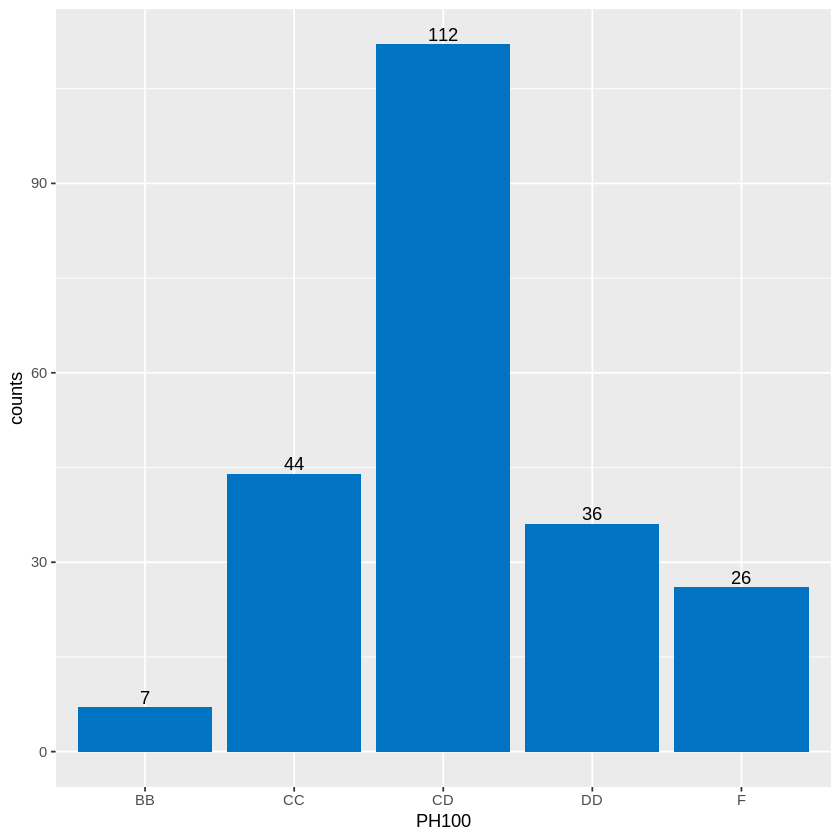

In [ ]:
course.grades.PH100 <- data.frame(cpdist(course.grades.net.fit,
                                         nodes = "PH100",
                                         evidence = ((EC100=="DD")&(IT101=="CC")&(MA101=="CD"))))

library(dplyr)
df <- course.grades.PH100 %>%
  group_by(PH100) %>%
  summarise(counts = n())

library(ggplot2)
ggplot(df, aes(x = PH100, y = counts)) +geom_bar(fill = "#0073C2FF", stat = "identity") +geom_text(aes(label = counts), vjust = -0.3)
